In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')


In [3]:
true['label'] = 1
fake['label'] = 0

In [4]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [6]:
df = pd.concat([ true, fake])
df = df.sample(frac = 1).reset_index(drop = True)
df.head()

,title,text,subject,date,label
0,French police arrest 10 far-right militants,PARIS (Reuters) - French anti-terrorist police...,worldnews,"October 17, 2017",1
1,GOP Continues Assault On Planned Parenthood E...,If you thought the Republican Party was going ...,News,"January 27, 2016",0
2,"FACTBOX: Oil companies in Caribbean, southeast...",(Reuters) - Energy infrastructure companies in...,worldnews,"September 15, 2017",1
3,Comey defends actions during 'challenging' U.S...,WASHINGTON (Reuters) - FBI Director James Come...,politicsNews,"January 5, 2017",1
4,John Oliver Offers Harsh Critique Of Dem Prim...,Is the primary process in the United States me...,News,"May 23, 2016",0


In [7]:
df.tail()

,title,text,subject,date,label
44893,Scotland can still offer choice on independenc...,"GLASGOW, Scotland (Reuters) - Nicola Sturgeon ...",worldnews,"October 10, 2017",1
44894,Watch This Profusely Oblivious Billionaire Qu...,There are people in this world who are willful...,News,"January 21, 2016",0
44895,"COLLEGE That Receives $280 Million In State, F...",OSU will receive more than $212 million in fed...,left-news,"Dec 14, 2016",0
44896,The World’s Buildings Turn Purple In Honor Of...,"The world is mourning the loss of a legend, as...",News,"April 22, 2016",0
44897,Hamas calls for Palestinian uprising over Trum...,JERUSALEM/GAZA (Reuters) - The Islamist group ...,worldnews,"December 7, 2017",1


In [8]:
#Number of rows and columns
df.shape

(44898, 5)

In [9]:
#Number of fake abd true news respectively.
df.label.value_counts()

0    23481
1    21417
Name: label, dtype: int64

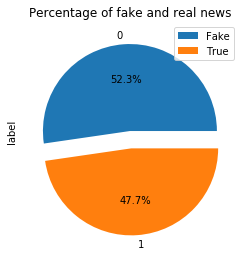

In [10]:
#Pie chart showing the percentage of fake news and true news.
df.label.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', explode = [0,0.2])
plt.title('Percentage of fake and real news')
plt.legend(['Fake', 'True'])
plt.show()

In [11]:
#Subject of news with the highest values.
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

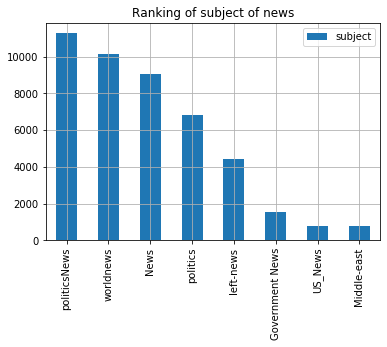

In [12]:
#Bar chart showing the subject of news from highest to lowest.
df.subject.value_counts().plot(kind = 'bar', grid = 'True')
plt.title('Ranking of subject of news')
plt.legend()
plt.show()

In [13]:
#Grouping of subject of news by label.
df.groupby('subject')['label'].value_counts()

subject          label
Government News  0         1570
Middle-east      0          778
News             0         9050
US_News          0          783
left-news        0         4459
politics         0         6841
politicsNews     1        11272
worldnews        1        10145
Name: label, dtype: int64

In [14]:
#Subject of news that are fake
df.loc[df.label == 0, 'subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [15]:
#Subject of news that are true
df.loc[df.label == 1, 'subject'].value_counts()


politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [16]:
#Politicalnews and worldnews are the only subjects that are found to carry true news.
#No single subject carried both type of news i.e no single subject carried both fake and real news

In [17]:
#Defining the feature(X) and target(y)
X = df['text']
y = df['label']

In [18]:
#Splitting the data into training and testing test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
#Vectorizing the dataset
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

In [20]:
#Building and evaluating the model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train_dtm, y_train)

C:\Users\-\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = log.predict(x_test_dtm)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9947290274684484

In [23]:
y_test[:5]

35305    0
29180    1
29805    1
38237    0
5099     0
Name: label, dtype: int64

In [24]:
y_pred[:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

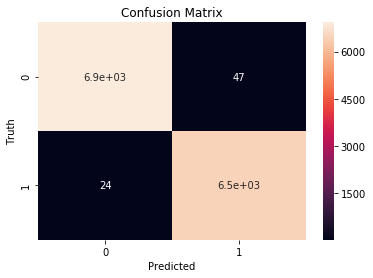

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()